<a href="https://colab.research.google.com/github/sagar2582/Capstone-5-Face-Emotion-Recognition/blob/main/Face_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 Introduction
* The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.
* Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
* In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (ex-
Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# 1.2 Problem Statement
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.
* 1.2.1 - **Face Emotion Recognition**
> This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.



# 1.3 Scope of Project


> A. Model should be able to identify students’ emotions using minimum reference images.

> B. Model should work on the real-time webcam video feed.

> C. Model must be deployed on AWS/GCP/Azure platform as an end-to-end solution.

> D. Model must be accessible via a web application (Streamlit) for demo purposes.


# Dataset Information
The data comes from the past Kaggle competition “Challenges in Representation Learning: Facial Expression Recognition Challenge”. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.

This dataset contains 35887 grayscale 48x48 pixel face images.

Each image corresponds to a facial expression in one of seven categories

Labels:

> 0 - Angry 😠

> 1 - Disgust 😧

> 2 - Fear 😨

> 3 - Happy 😃

> 4 - Sad 😞

> 5 - Surprise 😮

> 6 - Neutral 😐

* Dataset link - https://www.kaggle.com/msambare/fer2013

# Using DeepFace
> Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.

> The process of facial recognition starts with the human face and identifying its necessary facial features and patterns. A human face comprises a very basic set of features, such as eyes, nose, and mouth. Facial recognition technology learns what a face is and how it looks. This is done by using deep neural network & machine learning algorithms on a set of images with human faces looking at different angles or positions.

In [1]:
# import libraries for deep face

import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# installing deepface library

!pip install deepface

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 2.3 MB 29.0 MB/s 
     |████████████████████████████████| 462 kB 52.4 MB/s 


In [3]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


## Image Prediction using DeepFace

In [4]:
pip install Pillow

In [5]:
from PIL import Image

In [6]:
path = ('/content/drive/MyDrive/Colab Notebooks/Capstone - 5 Deep Learning/HappyFace.jpg')

In [7]:
img = cv.imread(path)

TypeError: ignored

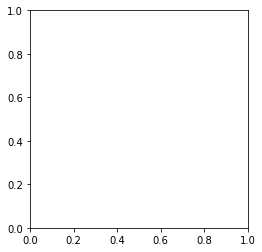

In [8]:
plt.imshow(img)